<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Alanave28/blob/main/CursoIBM_2_Mod5_A00989308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alan Avelino Fernández Juárez - A00989308**

##**MÓDULO 5**

###**Evaluación y refinamiento del modelo**

    * Evaluación de los Modelos
    * Modelo de Selección, Over-Fitting, Under-Fitting
    * Regresión Ridge
    * Grid Search


####**Evaluación de los Modelos**

La evaluación del modelo nos dice cómo funciona nuestro modelo en el mundo real.

- La evaluación dentro de la muestra nos dice qué tan bien nuestro modelo se ajusta a los datos ya proporcionados para entrenar.
  * No brinda una estimación de qué tan bien el modelo entrenado puede predecir nuevos datos.
- Separar los datos en conjuntos de entrenamiento y prueba es una parte importante de la evaluación del modelo.
  * Generalmente la mayor parte de los datos se usa para entrenamiento y una la parte más pequeña se utiliza para la prueba.

Solución:
- Dividir los datos.
- Utilizar los datos de entrenamiento para entrenar el modelo.
  * Construir un modelo
  * Descubrir relaciones predictivas.
- Los datos de prueba utilizarlos como datos fuera de la muestra.
  * Estos datos se utilizan para aproximar el rendimiento del modelo en el mundo real.
  * Evalua el rendimiento del modelo.
- Al concluir se usatilizan todos los datos para entrenar el modelo.

Ejemplo División de Conjuntos con sci-kit:

    * train_test_split()
      - Divide aleatoriamente un conjunto de datos en subconjuntos de entrenamiento y prueba.

    * from sklearn.model_selection import train_test_split
    * x_train, y_train, x_test, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
      - x_data -> Variable sindependientes
      - y_data -> Dataset Objetivo
      - x_train, y_train -> Subconjuntos de entrenamiento
      - x_test, y_test -> Subconjuntos de prueba
      - test_size -> Porcentaje del tamaño del subconjunto de prueba

El error de generalización es una medida de qué tan bien nuestros datos predicen cosas nunca antes vistas.
  * Se obtiene este valor aproximado usando los datos de prueba.

El uso de una gran cantidad de datos para el entrenamiento nos brinda un medio preciso para determinar cómo funciona nuestro modelo.

Si usamos menor porcentaje de datos para entrenar el modelo y más para probar el modelo, la precisión del error de generalización será menor, pero el modelo tendrá buena precisión.
  * Para superar este problema se utiliza la validación cruzada.

Una de las métricas de evaluación fuera de muestra más comunes es la validación cruzada.
  * En este método, el conjunto de datos se divide en k-grupos iguales.
  * Estas divisiones se pueden usar como un conjunto de entrenamiento, que usamos para entrenar el modelo, y las partes restantes se usan como un conjunto de prueba, que usamos para probar el modelo.
  * Cada partición se usa tanto para entrenamiento como para prueba.
  * Al final se utilizan los resultados promedio como la estimación del error fuera de la muestra.
  * La métrica de evaluación depende del modelo.

Ejemplo:

    * cross_val_score() -> realiza múltiples evaluaciones 'fuera de la muestra'.

    * from sklearn.model_selection import cross_val_score
    * scores = cross_val_score(lr, x_data, y_data, cv = 3)
      - lr -> tipo de modelo
      - x_data -> Variable predictora
      - y_data -> Variable Objetivo
      - cv -> gestiona el número de particiones

    * La función devuelve una matriz de puntuaciones, una para cada partición que se eligió como conjunto de prueba.
    * Podemos promediar el resultado juntos para estimar R-cuadrado fuera de la muestra usando la función media en numpy.
      - np.mean(scores)


¿Qué pasa si queremos saber la predicción real?
- cross_val_predict -> La salida es un predicción.
- Estas predicciones se almacenan en una matriz.

Ejemplo:

    * cross_val_predict() -> realiza múltiples evaluaciones 'fuera de la muestra'.

####**Modelo de Selección, Over-Fitting, Under-Fitting**

- El objetivo de la selección del modelo es determinar el orden del polinomio para proporcionar el mejor estimación de la función y x.

- Si tratamos de ajustar la función con una función lineal, la línea no es lo suficientemente compleja como para ajustar los datos.
  * Resultado: Muchos errores
  * Se le denomina Under-Fitting (SubAjuste)

- Cuando el modelo es demasiado flexible y se ajusta al ruido en lugar
que la función. Esto es especialmente evidente cuando hay pocos datos de entrenamiento; la función estimada oscila sin seguir la función.
  * Se le denomina Over-Fitting (Sobre-Ajuste)

En una gráfica:
  - Eje x -> Orden del polinomio
  - Eje y -> La media del error cuadrado
  - El error de entrenamiento disminuye con el orden del polinomio.
  - El error de prueba es un mejor medio para estimar el error de un polinomio. 
  - El error disminuye hasta que se determina el mejor orden del polinomio, entonces el error comienza a aumentar.
  - Noise (Ruido) -> es una de las razones del error porque es aleatorio y no podemos predecirlo; esto a veces se refiere como un error irreducible.

Para datos reales, el modelo puede ser demasiado difícil de ajustar, o es posible que no tengamos el tipo correcto de datos para estimar la función.

Ejemplo:
    
    * Rsqu_test = []
    * order = [1,2,3,4]
    * for n in order:
        pr = PolynomialFeatures(degree = n)
        x_train_pr = pr.fit_transforma(x_train[['col1']])
        x_tset_pr = pr.fit_transforma(x_test[['col1']])

        lr.fit(x_train_pr, y_train)
        Rsqu_test.append(lr.score(x_tset_pr, y_test))


####**Regresión Ridge**
- Evita el sobreajuste.
- Esta regresión controla la magnitud de estos coeficientes polinómicos introduciendo el parámetro alpha.
- Alpha es un parámetro que seleccionamos antes de ajustar o entrenar el modelo.
- Si alpha es demasiado grande, los coeficientes se aproximarán a cero y se ajustarán por debajo de los datos.
- Si alpha es cero, el sobreajuste es evidente.
- Si alpha es igual a 0,001, el sobreajuste comienza a disminuir.
- Si alpha es igual a 0,01, la función estimada sigue la función real.
- Si alpha es igual a 1, vemos los primeros signos de subajuste.

- Para seleccionar alpha usamos validación cruzada.

Ejemplo:

    * from sklearn.linear_model import Ridge
    * mod = Ridge(alpha = 0.1)
    * mod.fit(X,y)
    * Yhat = mod.predict(X)

la regresión de Ridge tiene la opción de normalizar los datos.

####**Grid Search**

Nos permite escanear a través de múltiples parámetros gratuitos con pocas líneas de código.

- Estos valores se denominan hiperparámetros.
- Scikit-learn tiene un medio para iterar automáticamente sobre estos hiperparámetros usando validación cruzada (Grid Search).

Proceso:
- Toma el modelo o los objetos que le gustaría entrenar y diferentes valores de los hiperparámetros.
- Calcula el error cuadrático medio o R cuadrado para varios valores de hiperparámetros permitiendo elegir los mejores valores.

- Se utilizan diferentes hiperparámetros para entrenar el modelo.
- Cada modelo produce un error.
- Se selecciona el hiperparámetro que minimiza el error.

- Para seleccionar el hiperparámetro se divide el conjunto de datos en tres partes, el conjunto de entrenamiento, conjunto de validación y conjunto de prueba.
- Entrenamos el modelo para diferentes hiperparámetros.
- Usamos la R cuadrada o el error cuadrático medio para cada modelo.
- Seleccionamos el hiperparámetro que minimiza el error cuadrático medio o maximiza el R al cuadrado en el conjunto de validación.
- Finalmente probamos el rendimiento de nuestro modelo utilizando los datos de prueba.

- R-Cuadrado es el método de puntuación predeterminado

Ejemplo:

    * from sklearn.linear_model import Ridge
    * from sklearn.model_selection import GridSearchCV
    * param = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
    * rr = Ridge()
    * grid = GridSearchCV(rr, param, cv=4)
    * grid.fit(x_data, y_data)
    * grid.best_estimator_
    * scores = grid.cv_results_
    * scores['mean_test_score']

Una de las ventajas de la búsqueda en cuadrícula es la rapidez con la que podemos probar múltiples parámetros.

Presenta la opción de normalizar los datos.
 * param = [{'alpha':[1, 10, 100, 1000], 'normalize': [True, False]}]

###**Laboratorio**

####**1. Model Evaluation and Refinement**

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt 

Functions for Plotting

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Part 1: Training and Testing

In [8]:
y_data = df['price']

In [9]:
x_data=df.drop('price',axis=1)

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [11]:
#Pregunta 1 - Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [12]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [13]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [14]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [15]:
#Pregunta 2 - Find the R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

Cross-Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [17]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [18]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [19]:
#Pregunta 3 - Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [20]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

####**Part 2: Overfitting, Underfitting and Model Selection**

In [21]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [22]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


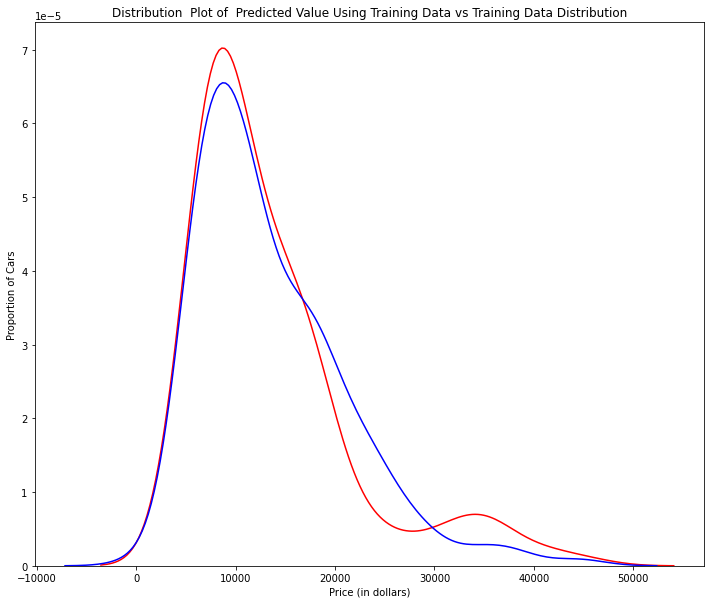

In [23]:
import seaborn as sns

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


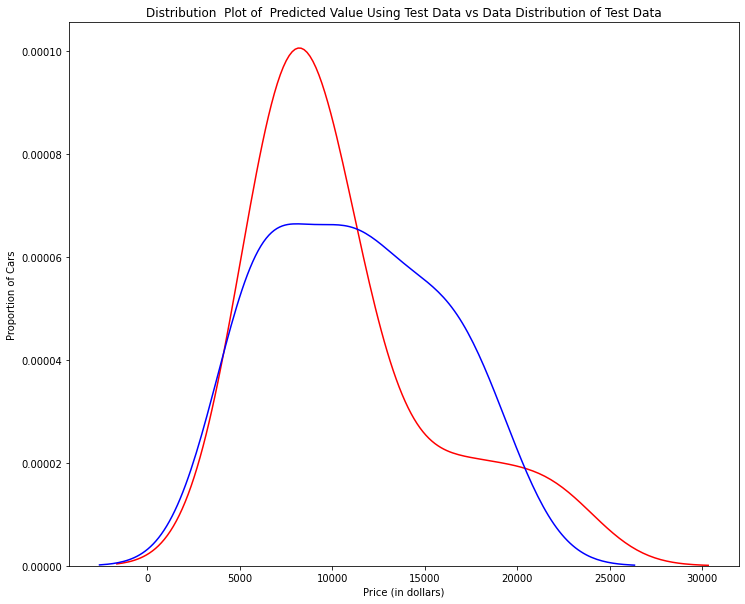

In [24]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

Overfitting

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [29]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [30]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


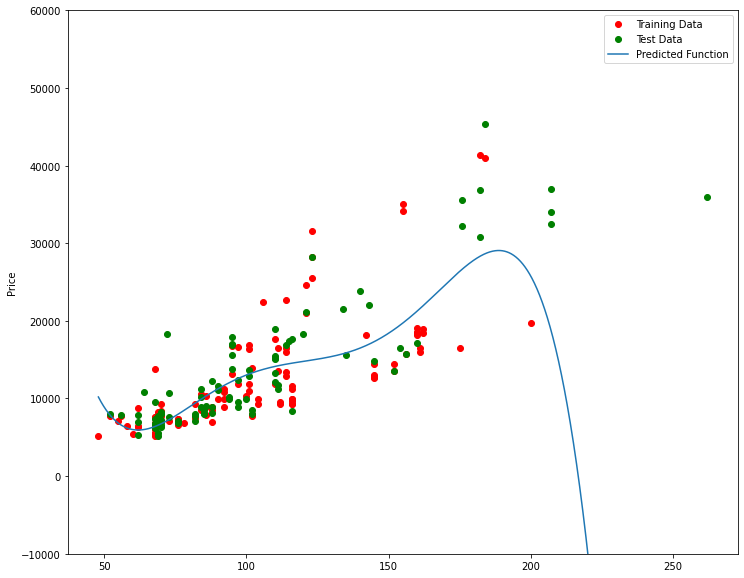

In [31]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [32]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [33]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

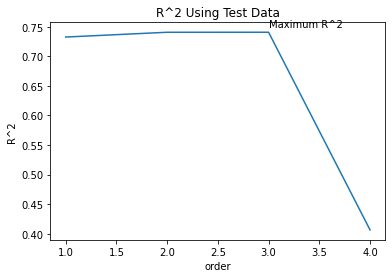

In [34]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [35]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)


In [36]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [37]:
#Pregunta 4A - We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

In [38]:
#Pregunta 4B - Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [39]:
#Pregunta 4C - How many dimensions does the new feature have? Hint: use the attribute "shape".
x_train_pr1.shape

(110, 15)

In [42]:
#Pregunta 4D - Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression().fit(x_train_pr1,y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


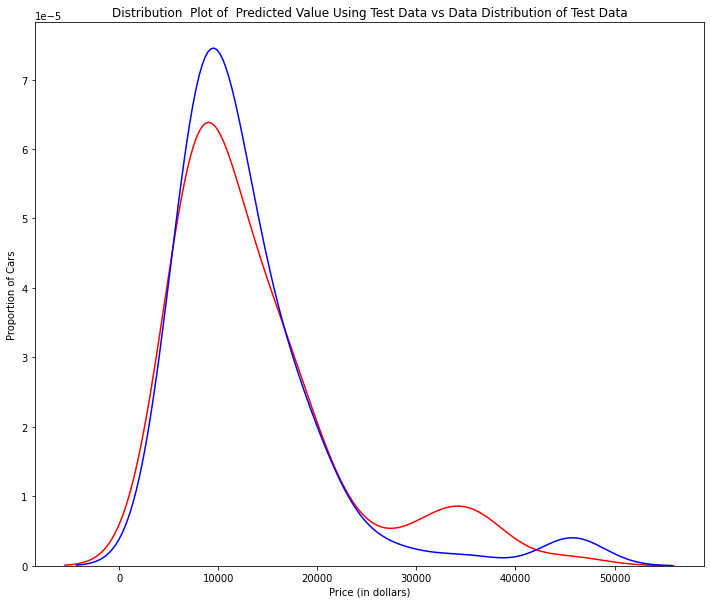

In [43]:
#Pregunta 4E - Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [44]:
#Pregunta 4F - Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.

# El valor pronosticado es más alto que el valor real para automóviles en los que el rango de precio es de $10 000; por el contrario, 
#el precio pronosticado es más bajo que el costo del precio en el rango de $30 000 a $40 000.

####**Part 3: Ridge Regression**

In [45]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [46]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [47]:
yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [48]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 137.51it/s, Test Score=0.564, Train Score=0.859]


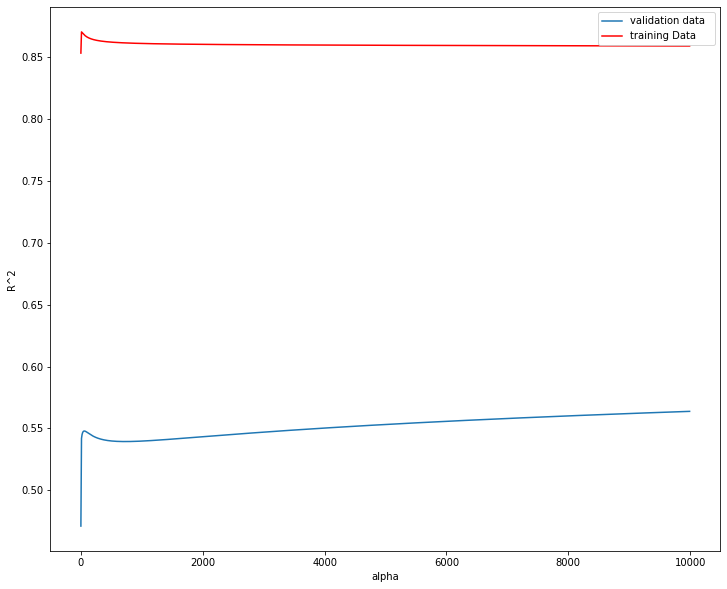

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [50]:
#Pregunta 5 - Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

####**Part 4: Grid Search**

In [51]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [52]:
RR=Ridge()
RR

Ridge()

In [53]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [54]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [55]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

###**Examen**

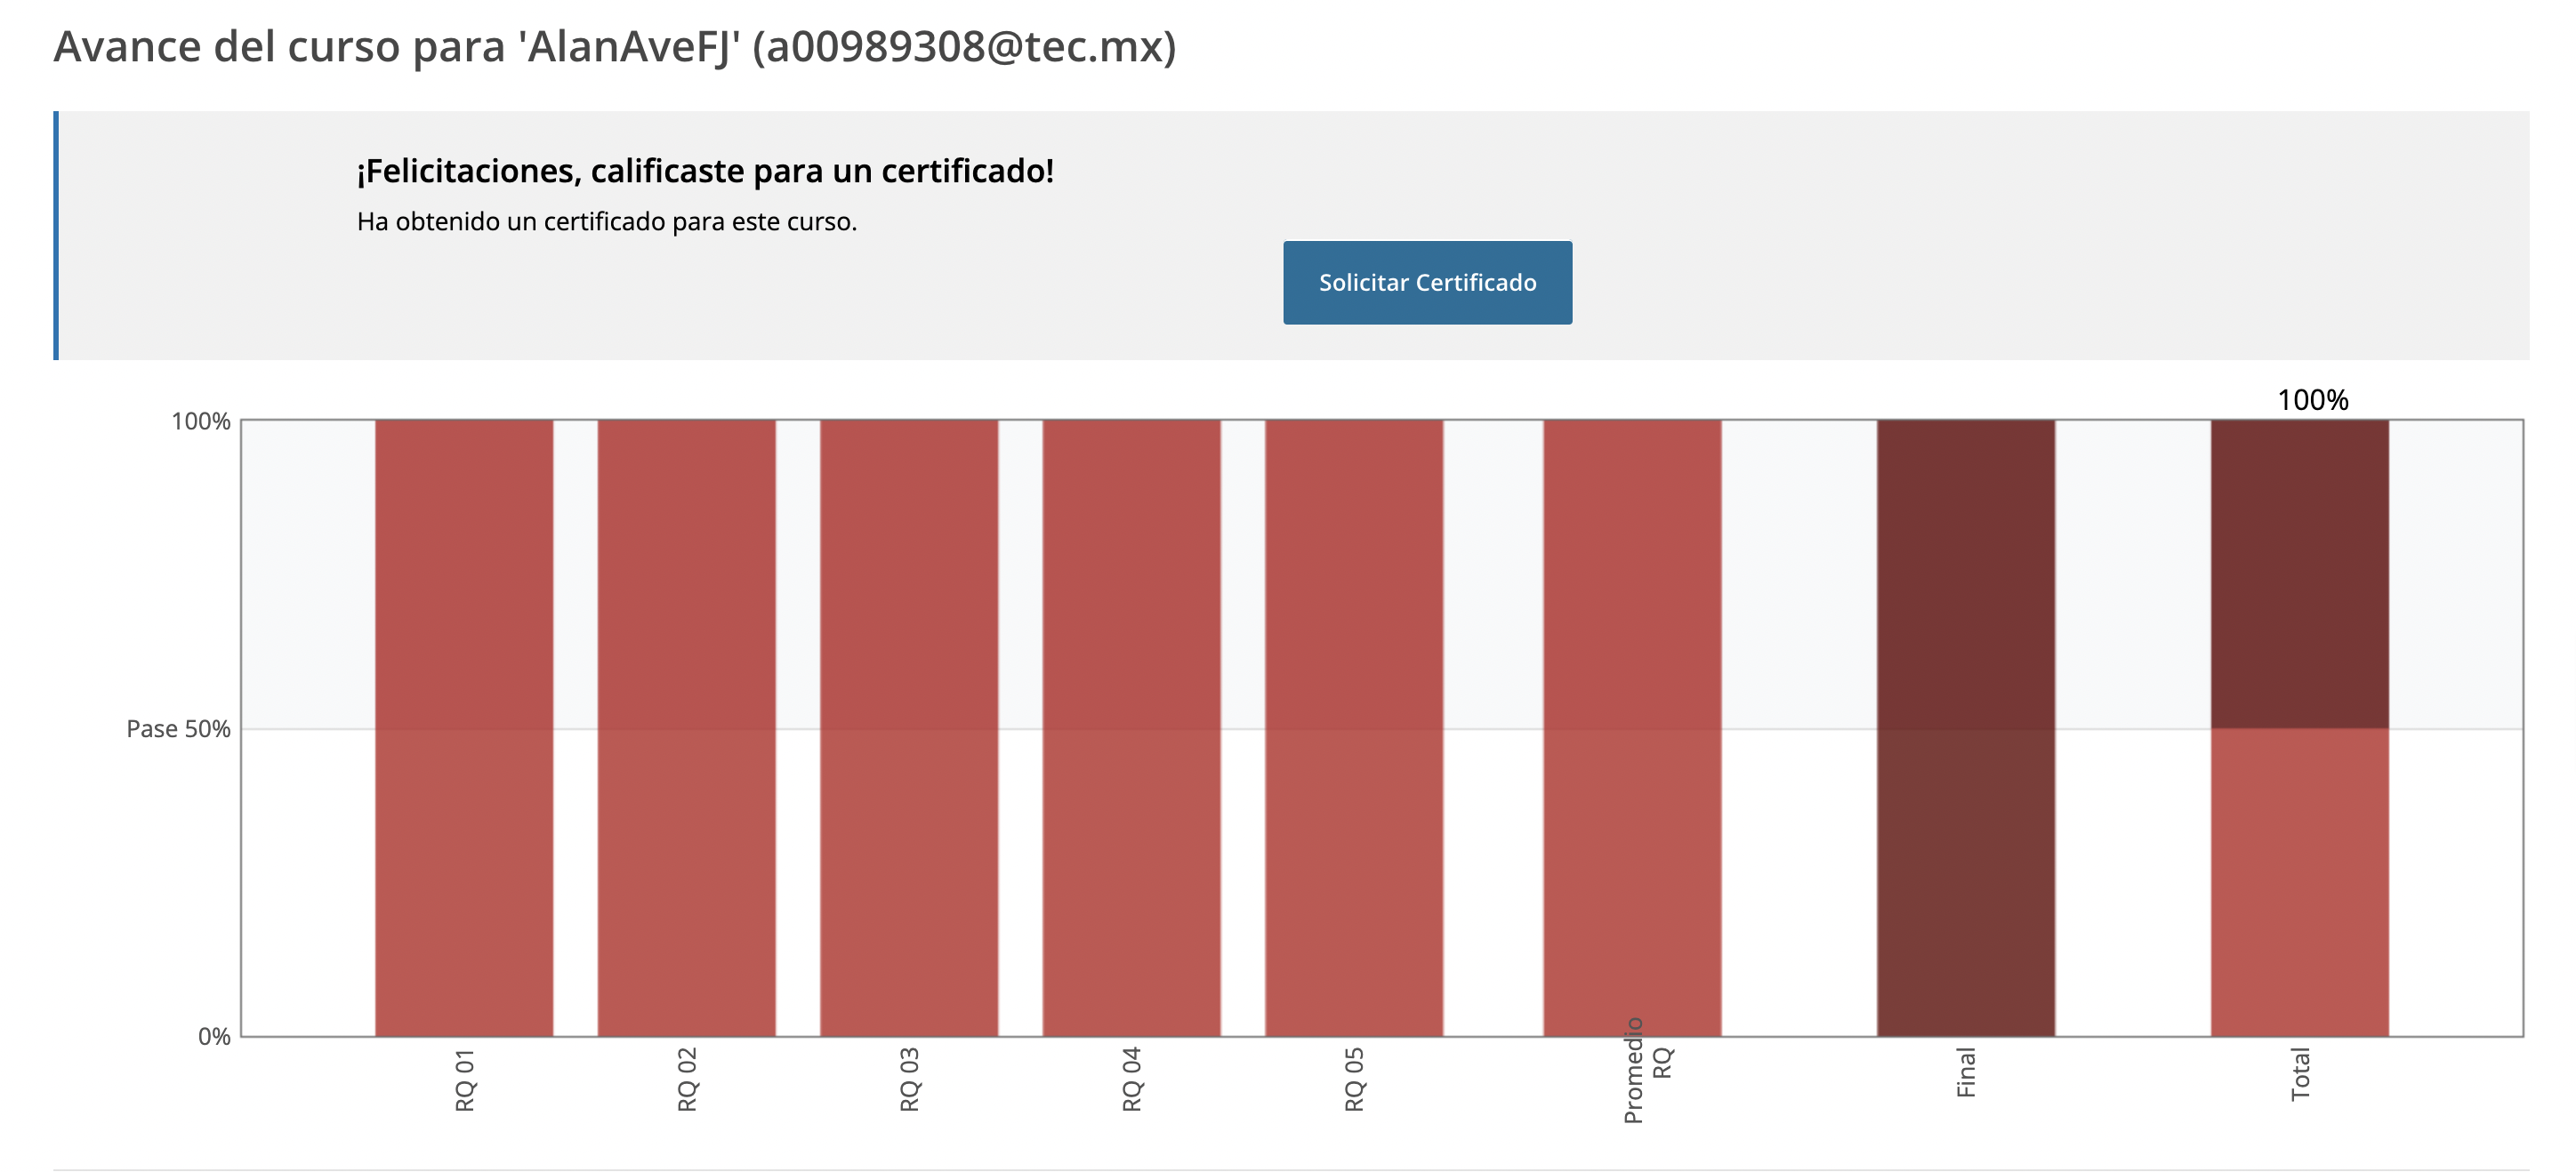

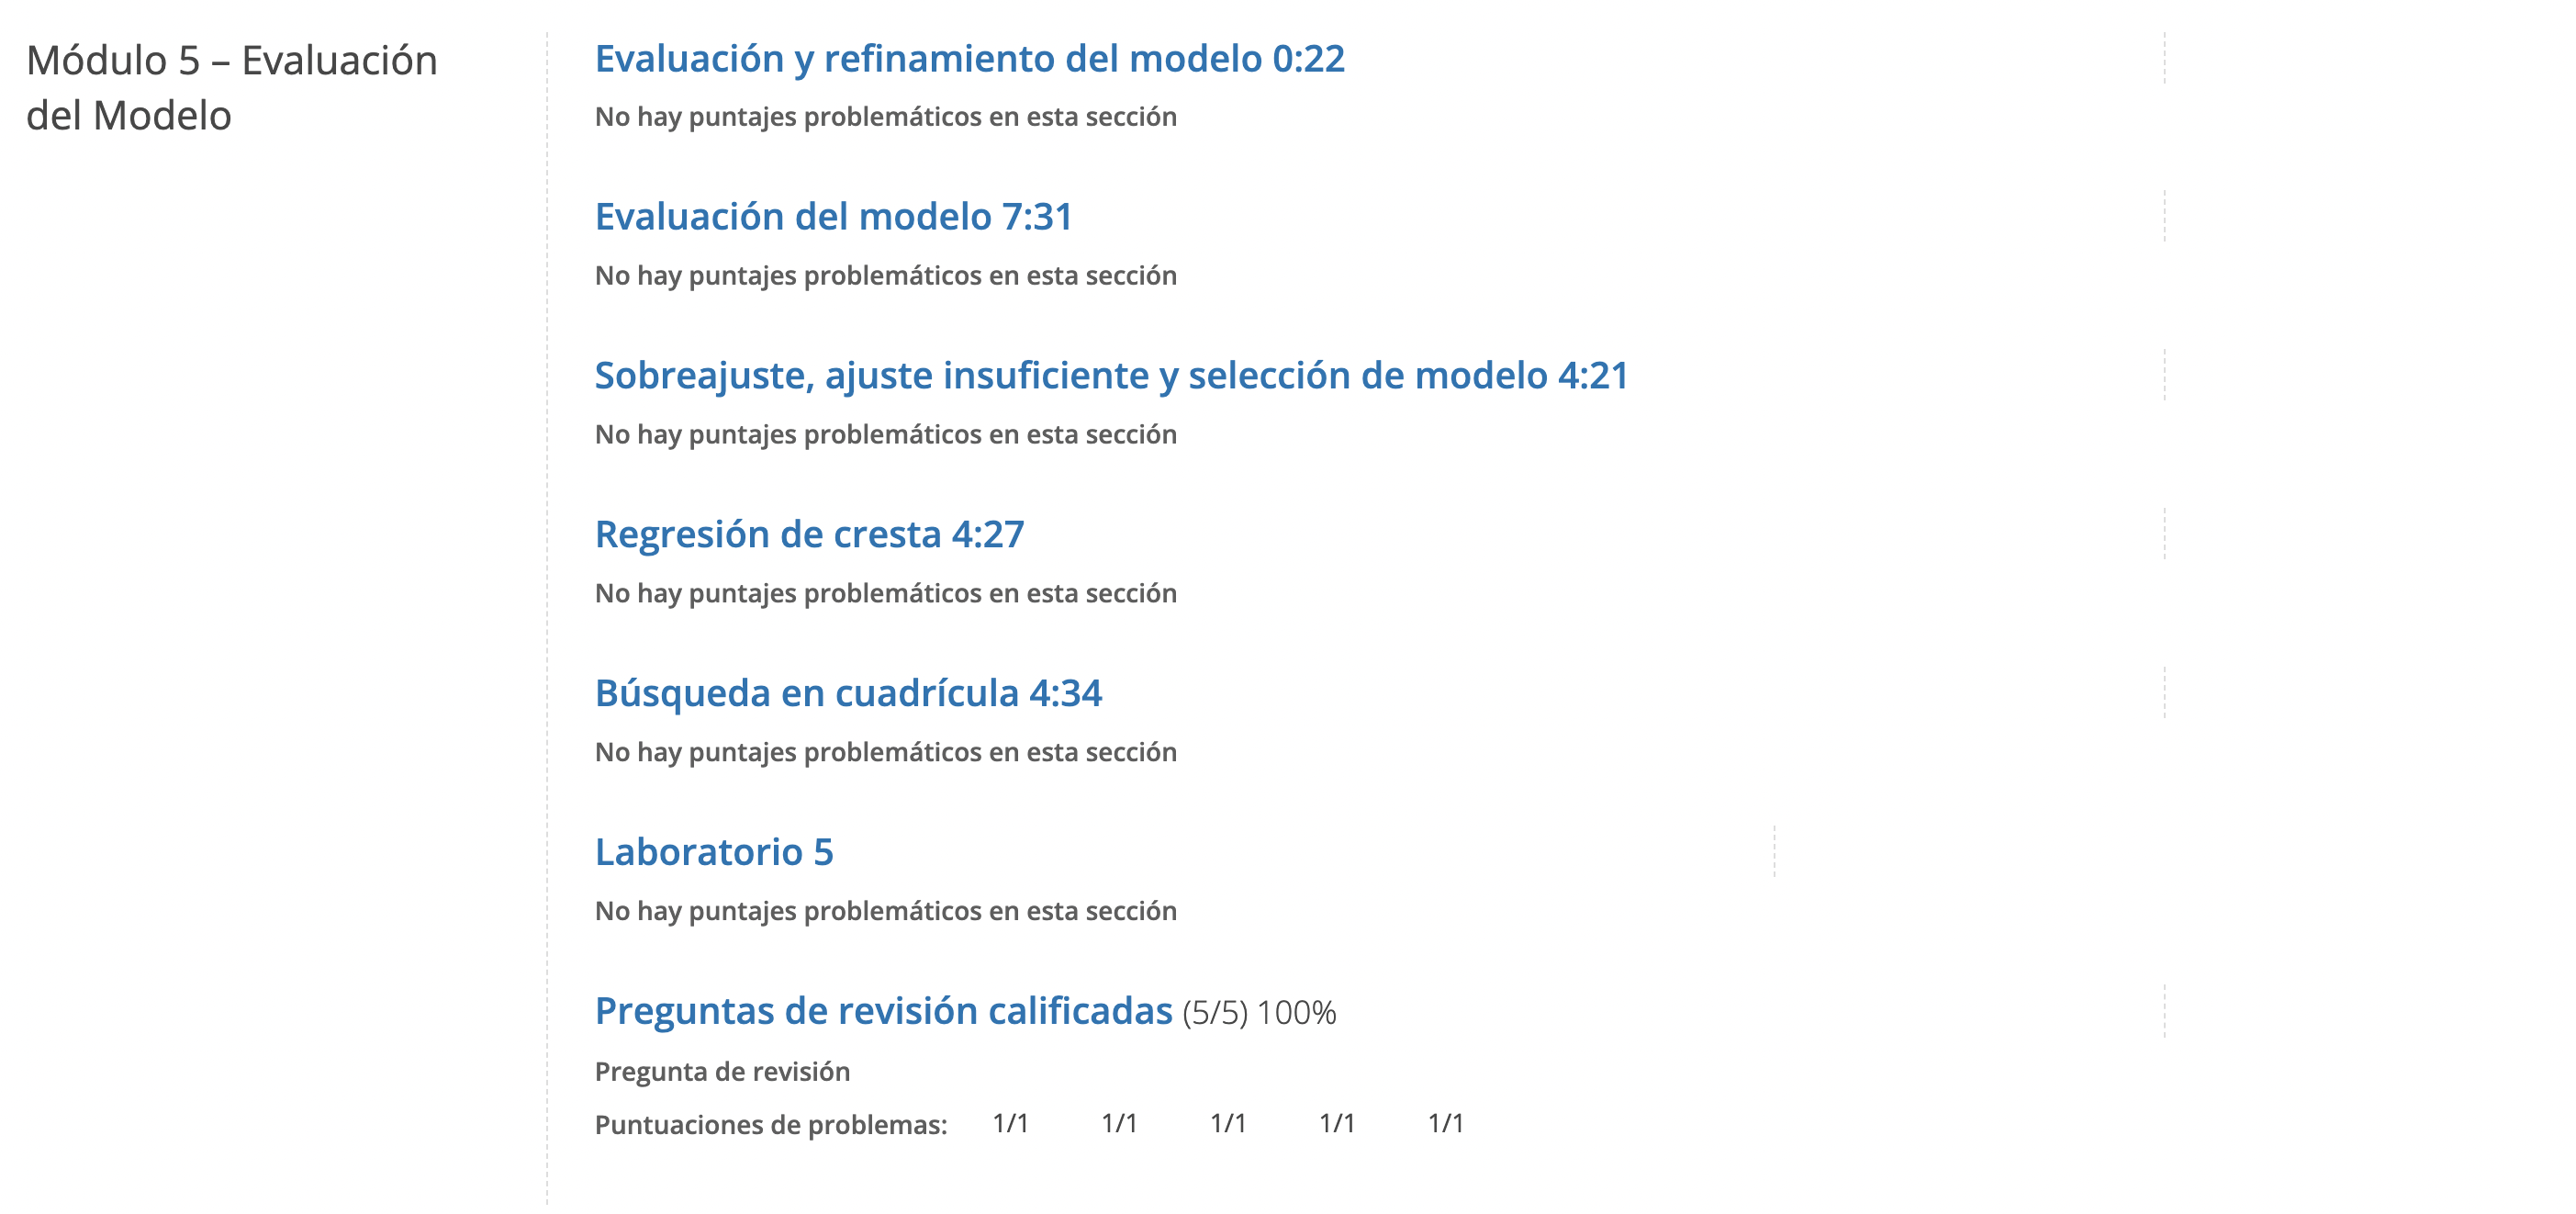